In [1]:
# Prerequisite Imports
import pyabf
import numpy as np
import matplotlib.pyplot as plt

#other modules
import seaborn as sb
import pandas as pds

In [6]:
# Load an ABF File
abf = pyabf.ABF(r"C:\Users\tsaim5\ephys\data\09-22-29_VIP-cre_DREADD_h4mDi_Citrine_P60\t01919a_VIP_0000_preCNO.abf")
print(abf)

ABF (version 2.5.0.0) with 1 channel (mV), sampled at 10.0 kHz, containing 10 sweeps, having no tags, with a total length of 0.51 minutes, recorded with protocol "IC_current injection_ch1".


In [8]:
# Inspect the ABF header
#print(abf.headerText) # display header information in the console
abf.headerLaunch() # display header information in a web browser

In [10]:
# Access Sweep Data

abf.setSweep(9)
print("sweep data (ADC):", abf.sweepY)
print("sweep command (DAC):", abf.sweepC)
print("sweep times (seconds):", abf.sweepX)

sweep data (ADC): [-75.4395 -75.531  -75.531  ... -76.3855 -76.3245 -76.416 ]
sweep command (DAC): [0. 0. 0. ... 0. 0. 0.]
sweep times (seconds): [0.     0.0001 0.0002 ... 0.4997 0.4998 0.4999]


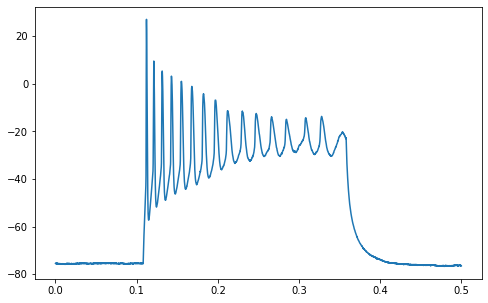

In [11]:
# Plot a Sweep with Matplotlib
abf.setSweep(9)
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepX, abf.sweepY)
plt.show()

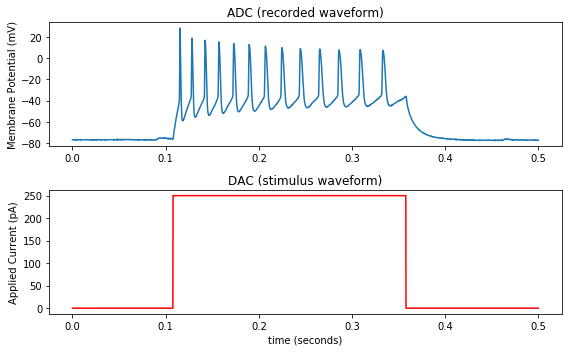

In [62]:
# Plot the Command Waveform
abf.setSweep(6)
fig = plt.figure(figsize=(8, 5))

# plot the ADC (voltage recording)
ax1 = fig.add_subplot(211)
ax1.set_title("ADC (recorded waveform)")
ax1.plot(abf.sweepX, abf.sweepY)

# plot the DAC (clamp current)
ax2 = fig.add_subplot(212)
ax2.set_title("DAC (stimulus waveform)")
ax2.plot(abf.sweepX, abf.sweepC, color='r')

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
#plt.show()
plt.tight_layout()

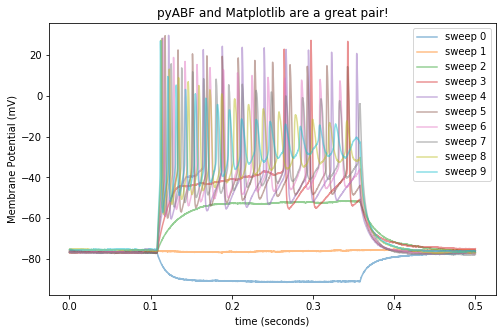

In [65]:
# Decorate Plots with ABF Information
plt.figure(figsize=(8, 5))
plt.title("pyABF and Matplotlib are a great pair!")
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
for i in abf.sweepList:
    abf.setSweep(i)
    plt.plot(abf.sweepX, abf.sweepY, alpha=.5, label="sweep %d" % (i))
plt.legend()
plt.show()

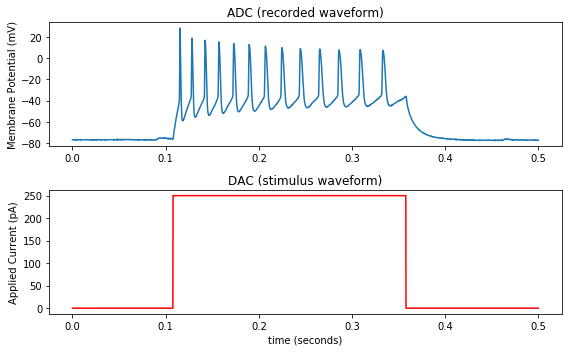

In [56]:
# Plot the Command Waveform
abf.setSweep(6)
fig = plt.figure(figsize=(8, 5))

# plot the ADC (voltage recording)
ax1 = fig.add_subplot(211)
ax1.set_title("ADC (recorded waveform)")
ax1.plot(abf.sweepX, abf.sweepY)

# plot the DAC (clamp current)
ax2 = fig.add_subplot(212)
ax2.set_title("DAC (stimulus waveform)")
ax2.plot(abf.sweepX, abf.sweepC, color='r')

# decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)
#plt.show()
plt.tight_layout()

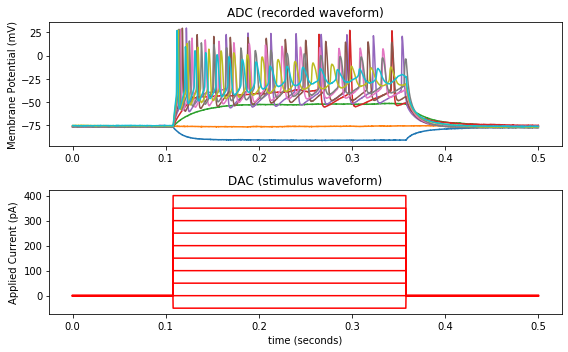

In [55]:
# Plot the Command Waveform
fig = plt.figure(figsize=(8, 5))
# plot the ADC (voltage recording)
ax1 = fig.add_subplot(211)
ax1.set_title("ADC (recorded waveform)")
# plot the DAC (clamp current)
ax2 = fig.add_subplot(212)
ax2.set_title("DAC (stimulus waveform)")
 # decorate the plots
ax1.set_ylabel(abf.sweepLabelY)
ax2.set_xlabel(abf.sweepLabelX)
ax2.set_ylabel(abf.sweepLabelC)

for i in abf.sweepList:
    abf.setSweep(i)
    #abf.setSweep(9)
    ax1.plot(abf.sweepX, abf.sweepY)  
    ax2.plot(abf.sweepX, abf.sweepC, color='r')

#plt.show() 
plt.tight_layout()

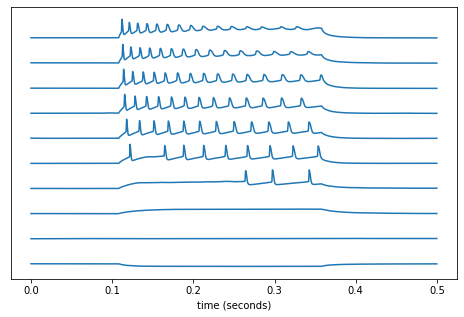

In [57]:
#Plot Stacked Sweeps

plt.figure(figsize=(8, 5))

# plot every sweep (with vertical offset)
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    offset = 140*sweepNumber
    plt.plot(abf.sweepX, abf.sweepY+offset, color='C0')

# decorate the plot
plt.gca().get_yaxis().set_visible(False)  # hide Y axis
plt.xlabel(abf.sweepLabelX)
plt.show()

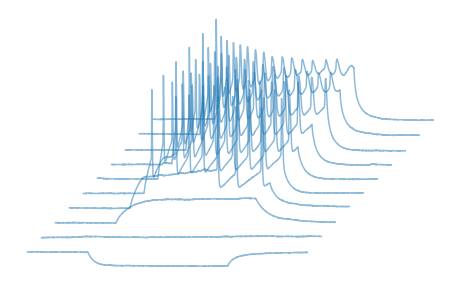

In [58]:
# Plot Sweeps in 3D
plt.figure(figsize=(8, 5))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    i1, i2 = 0, int(abf.dataRate * 1)  # plot part of the sweep
    dataX = abf.sweepX[i1:i2] + .025 * sweepNumber
    dataY = abf.sweepY[i1:i2] + 15 * sweepNumber
    plt.plot(dataX, dataY, color='C0', alpha=.5)

plt.gca().axis('off')  # hide axes to enhance floating effect
plt.show()

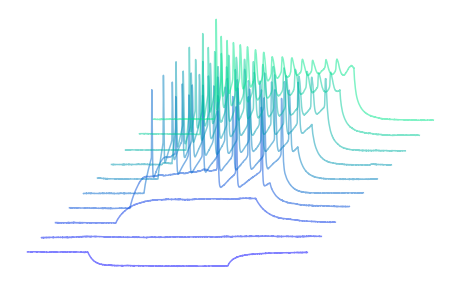

In [59]:
# use a custom colormap to create a different color for every sweep
cm = plt.get_cmap("winter")
colors = [cm(x/abf.sweepCount) for x in abf.sweepList]
# colors.reverse()

plt.figure(figsize=(8, 5))
for sweepNumber in abf.sweepList:
    abf.setSweep(sweepNumber)
    i1, i2 = 0, int(abf.dataRate * 1)
    dataX = abf.sweepX[i1:i2] + .025 * sweepNumber
    dataY = abf.sweepY[i1:i2] + 15 * sweepNumber
    plt.plot(dataX, dataY, color=colors[sweepNumber], alpha=.5)

plt.gca().axis('off')
plt.show()

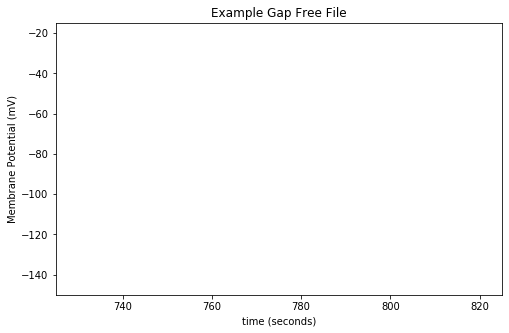

In [60]:
#Plotting Gap-Free ABFs
plt.figure(figsize=(8, 5))
plt.plot(abf.sweepX, abf.sweepY, lw=.5)
plt.axis([725, 825, -150, -15])
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
plt.title("Example Gap Free File")
plt.show()

# Plot Multi-Channel ABFs
fig = plt.figure(figsize=(8, 5))

# plot the first channel
abf.setSweep(sweepNumber=0, channel=0)
plt.plot(abf.sweepX, abf.sweepY, label="Channel 1")

# plot the second channel
abf.setSweep(sweepNumber=0, channel=1)
plt.plot(abf.sweepX, abf.sweepY, label="Channel 2")

# decorate the plot
plt.ylabel(abf.sweepLabelY)
plt.xlabel(abf.sweepLabelX)
plt.axis([25, 45, -70, 50])
plt.legend()
plt.show()